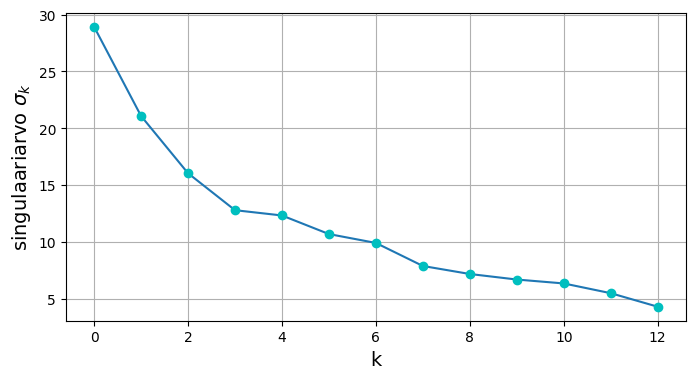

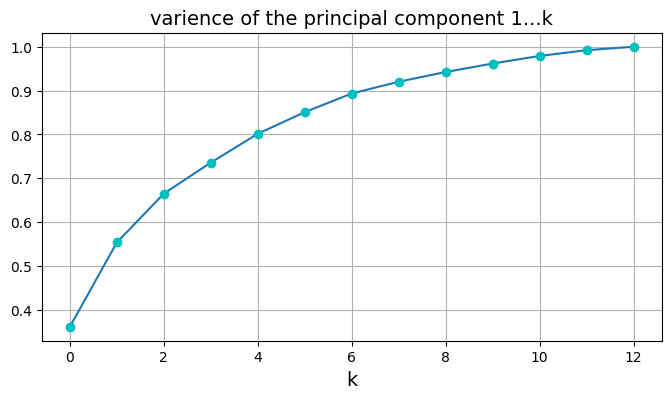

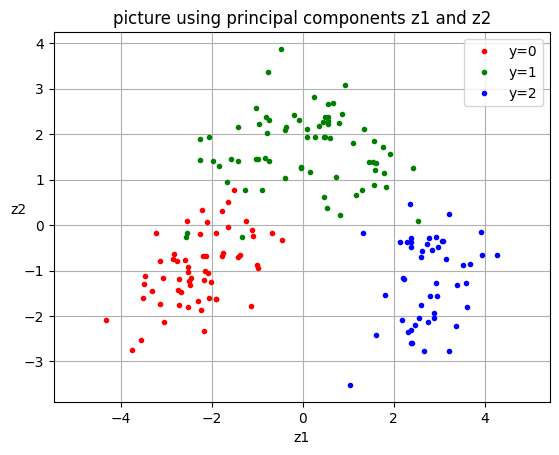

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
#%%
X,y = datasets.load_wine(return_X_y = True)

#X = 178x13-matrix, datapoints as rows
#y=0,1,2=viini Barolo,Grignolino,Barbera
#%%
#X,y=datasets.fetch_olivetti_faces(return_X_y=True)

#X=400x4096-matrix, datapoints as rows
#y=0,1,2,...,39=person number

#scaling
mu = np.mean(X, axis = 0)
stds = np.std(X, axis = 0)

Xhat = (X - mu) / stds

U,s,V = np.linalg.svd(Xhat, full_matrices = False)
Z = U * s

'''
for k in range(4):
    plt.subplot(1,4,k+1)
    plt.hist(Xhat[:,k],zorder=2,edgecolor='k')
    plt.grid()
    plt.title('x'+str(k+1),fontsize=14)
'''

plt.figure(figsize = (8,4))
plt.plot(s)
for i in range(13):
  plt.plot(i, s[i], 'co')
plt.grid()
plt.xlabel('k',fontsize=14)
plt.ylabel('singulaariarvo $\sigma_k$',fontsize=14)
plt.show()

u = np.cumsum(s ** 2)
v = np.sum(s ** 2)
plt.figure(figsize = (8,4))

z = u / v
plt.plot(u / v)
plt.grid()
for i in range(13):
  plt.plot(i, z[i], 'co')
plt.xlabel('k', fontsize = 14)
plt.title('varience of the principal component 1...k', fontsize=14)
plt.show()

plt.plot(Z[y==0,0],Z[y==0,1],'r.',label='y=0')
plt.plot(Z[y==1,0],Z[y==1,1],'g.',label='y=1')
plt.plot(Z[y==2,0],Z[y==2,1],'b.',label='y=2')
plt.grid()
plt.axis('equal')
plt.xlabel('z1')
plt.ylabel('z2',rotation=0)
plt.legend()
plt.title('picture using principal components z1 and z2')
plt.show()


Exercise 2:


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


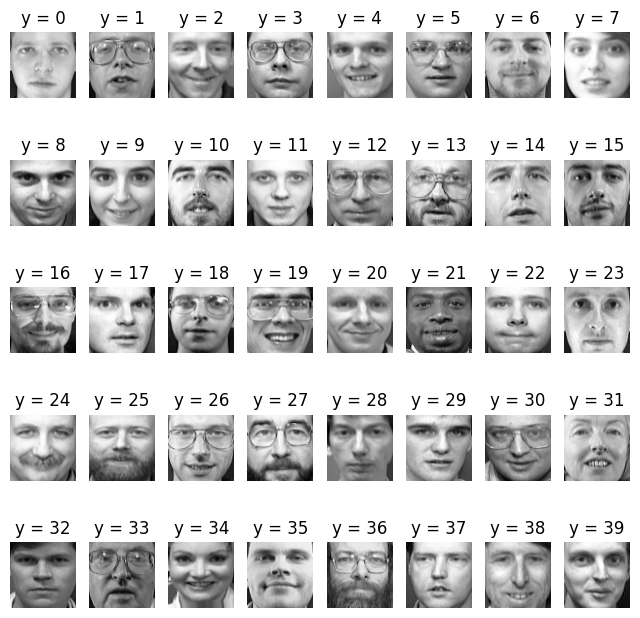

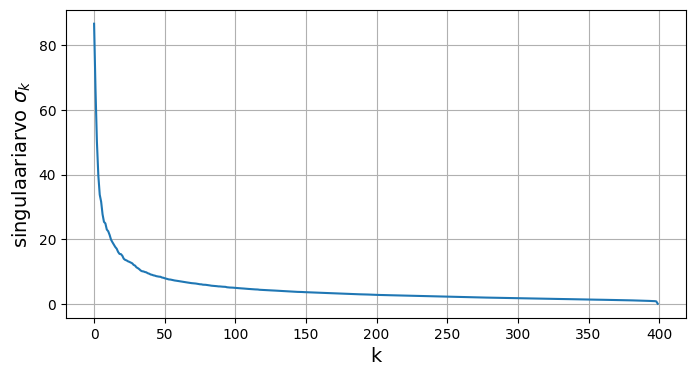

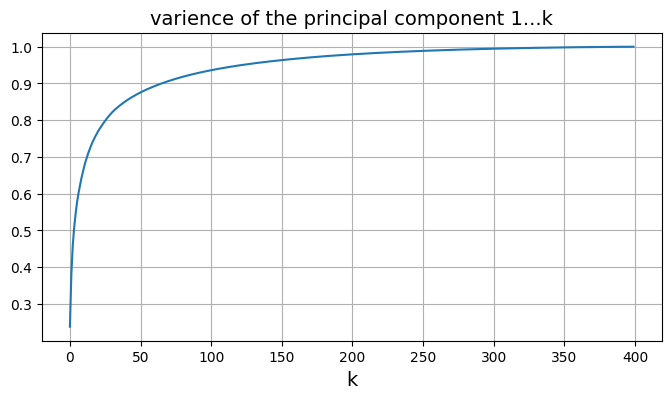

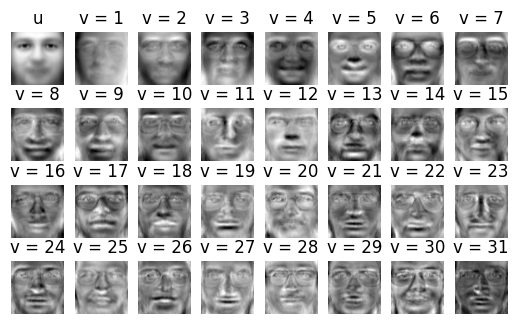

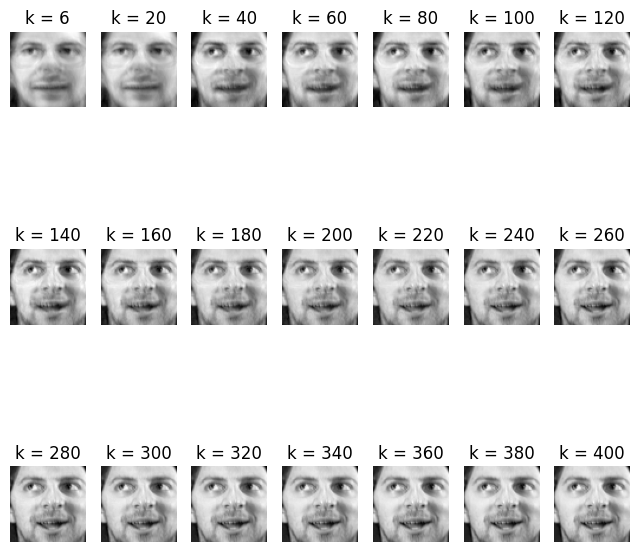

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
np.set_printoptions(precision=3,linewidth=1000,suppress=True)
#%%
#X,y=datasets.load_wine(return_X_y=True)

#X = 178x13-matrix, datapoints as rows
#y=0,1,2=viini Barolo,Grignolino,Barbera
#%%
X,y=datasets.fetch_olivetti_faces(return_X_y = True)

#X=400x4096-matrix, datapoints as rows
#y=0,1,2,...,39=person number

plt.figure(figsize=(8,8))

for i in range(40):
  plt.subplot(5, 8, i + 1)
  plt.imshow(X[i * 10, :].reshape(64,64), cmap='gray')
  plt.title('y = {}'.format(i))
  plt.axis('off')

#scaling
mu = np.mean(X, axis = 0)
Xhat = X - mu

U,s,V = np.linalg.svd(Xhat,full_matrices=False)
Z = U * s

plt.figure(figsize=(8,4))
plt.plot(s)
plt.grid()
plt.xlabel('k',fontsize=14)
plt.ylabel('singulaariarvo $\sigma_k$',fontsize=14)
plt.show()
u = np.cumsum(s**2)
v = np.sum(s**2)
plt.figure(figsize=(8,4))
plt.plot(u / v)
plt.grid()
plt.xlabel('k', fontsize=14)
plt.title('varience of the principal component 1...k', fontsize=14)
plt.show()

plt.subplot(5, 8, 1)
plt.imshow(mu.reshape(64,64), cmap='gray')
plt.axis('off')
plt.title('u')

for i in range(1, 32):
  plt.subplot(5, 8, i + 1)
  plt.imshow(V[i, :].reshape(64,64), cmap='gray')
  plt.title('v = {}'.format(i))
  plt.axis('off')

Z = U * s
plt.figure(figsize=(8, 8))

plt.subplot(3, 7, 1)
la = mu + Z[65, :20].reshape(1, 20)@V[:20,:]
plt.imshow(la.reshape(64, 64), cmap='gray')
plt.title('k = {}'.format(6))
plt.axis('off')
i = 2
for k in range(20, 420, 20):
  plt.subplot(3, 7, i)
  la = mu + Z[65,:k].reshape(1,k)@V[:k,:]
  plt.imshow(la.reshape(64, 64), cmap='gray')
  plt.title('k = {}'.format(k))
  i += 1
  plt.axis('off')